In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

It looks like the series has some structure; there are patterns re-emerging from time to time.

Although, the distribution look uniform --- confirmed by QQ-plot and historgram. But the x[t] vs x[t-1] scatterplot shows more a determistic behavior.

Hence, it is always good to check if there is any non-linear relationship using scatter plot. ACF only captures the linear case.

In [26]:
with open("xmysteryar1.txt") as f:
    t = f.read()

sr = pd.Series(map(float, t.strip().split("   ")))

<AxesSubplot: >

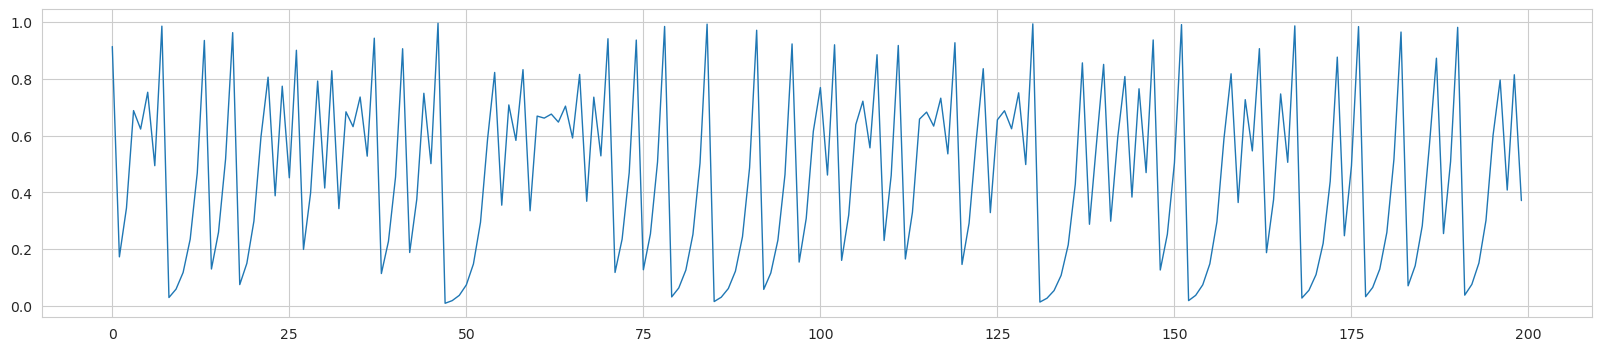

In [92]:
sr.iloc[:200].plot(figsize=(20, 4), linewidth=1)

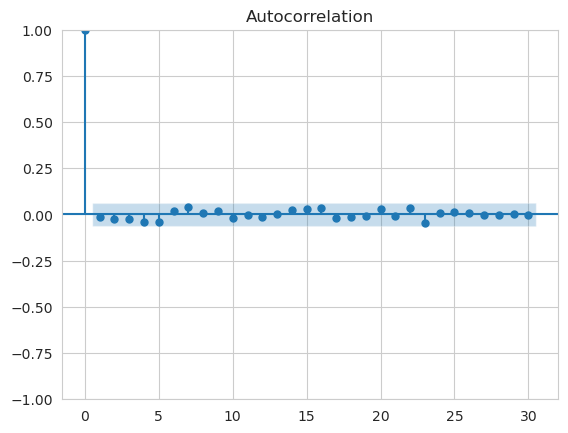

In [53]:
_ = sm.graphics.tsa.plot_acf(sr)

<AxesSubplot: ylabel='Count'>

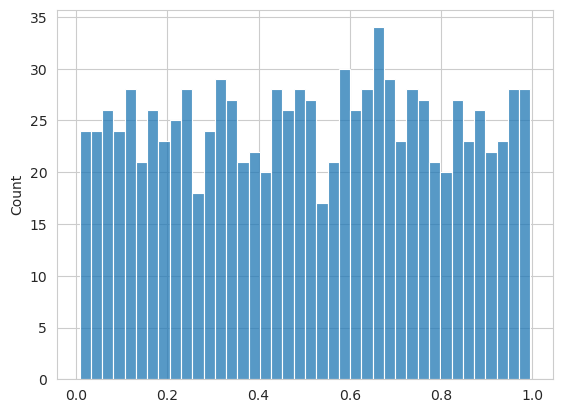

In [74]:
sns.histplot(sr, bins=40)

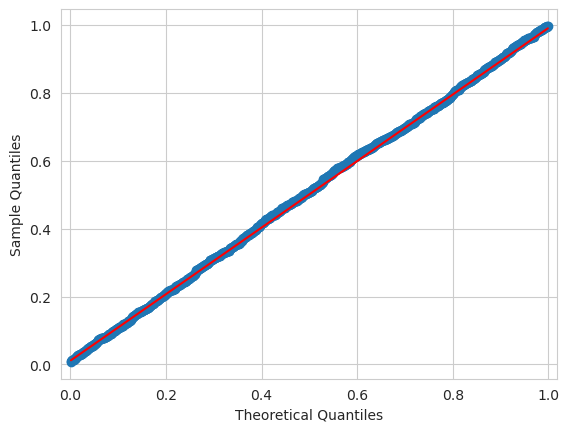

In [69]:
_ = sm.qqplot(sr, dist=stats.uniform, line='q')

Text(0, 0.5, '$x_{t-1}$')

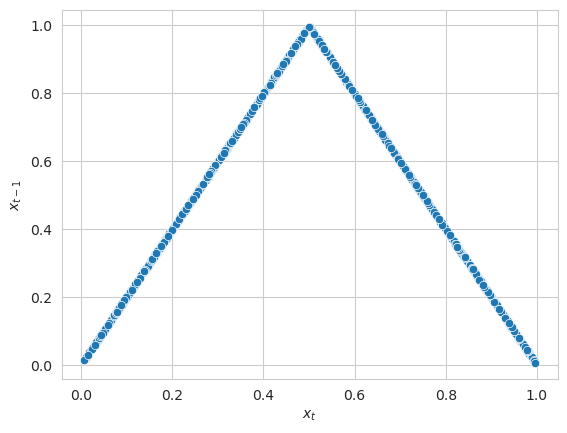

In [86]:
ax = sns.scatterplot(y=sr, x=sr.shift(1))
ax.set_xlabel('$x_t$')
ax.set_ylabel('$x_{t-1}$')

Text(0, 0.5, '$x_{t-2}$')

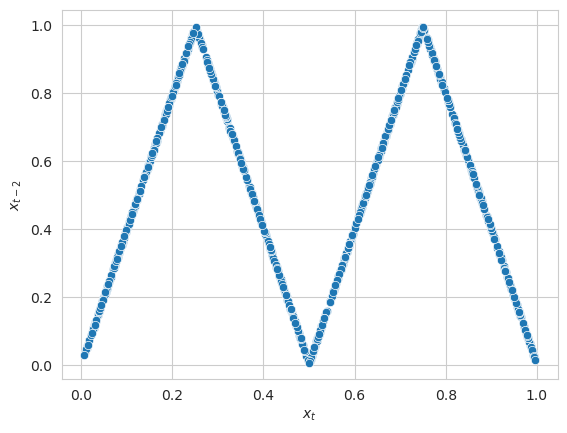

In [87]:
ax = sns.scatterplot(y=sr, x=sr.shift(2))
ax.set_xlabel('$x_t$')
ax.set_ylabel('$x_{t-2}$')